Loading data...
Téléchargement des données...
Data shape: (297, 14)

Preprocessing data...

Training Model 1...
Epoch 1/50
6/6 [==============================] - 2s 118ms/step - loss: 0.6855 - accuracy: 0.5450 - val_loss: 0.6612 - val_accuracy: 0.6875
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 0.6296 - accuracy: 0.6825 - val_loss: 0.6479 - val_accuracy: 0.7083
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.5430 - accuracy: 0.7619 - val_loss: 0.6314 - val_accuracy: 0.7292
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 0.5014 - accuracy: 0.7831 - val_loss: 0.6138 - val_accuracy: 0.7708
Epoch 5/50
6/6 [==============================] - 0s 17ms/step - loss: 0.4822 - accuracy: 0.7884 - val_loss: 0.5954 - val_accuracy: 0.7708
Epoch 6/50
6/6 [==============================] - 0s 17ms/step - loss: 0.4436 - accuracy: 0.8042 - val_loss: 0.5778 - val_accuracy: 0.7708
Epoch 7/50
6/6 [==============================] - 0s 

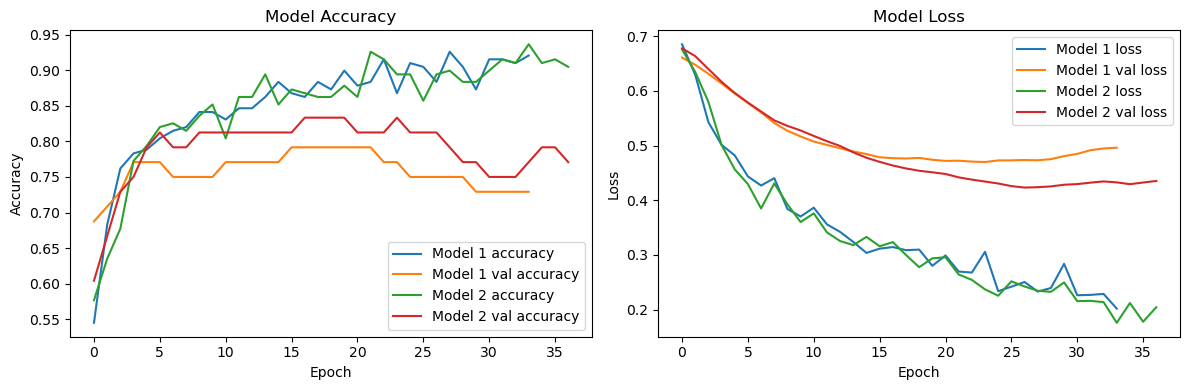

"\n## Exercice 1 : \nadapter le programme sur les données suivantes : \nhttps://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data\n\n\n## Exercice 2 : \nOn vous demande d'implémenter 2 autres modèles en suivant le schéma du programme donné. Sur les 2 data-set. \n\nL'objectif est de rendre un rapport explicatif complet sur au moins un des modèles ; le code doit être commenté et des tests (changement de paramètres : itération, taux, couches réseaux) doivent être fait.\n\n### Premier Modèle : Random Forest Classifier\n\nCe modèle est particulièrement intéressant car il offre :\n- Une excellente performance sur les données médicales\n- Une interprétabilité des résultats\n- Une facilité relative d'implémentation\n\nVoici un exemple de structure pour l'implémentation :\n\n```python\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\ndef create_model_rf(X_train, y_train):\n    # Création du modèle avec des

In [4]:
"""
Projet de Machine Learning : Prédiction de Maladies Cardiaques (Version corrigée)
Dataset : UCI Heart Disease Dataset
Objectif : Comparer deux architectures de réseaux de neurones pour la prédiction de maladies cardiaques
"""

import pandas as pd
import numpy as np
import urllib.request
import ssl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Chargement des données avec gestion du SSL
def load_data():
    try:
        # Créer un contexte SSL non-vérifié (à utiliser avec précaution)
        ssl._create_default_https_context = ssl._create_unverified_context
        
        # URL du dataset
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
        
        # Définir les noms des colonnes
        columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                  'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
        
        print("Téléchargement des données...")
        
        # Télécharger directement dans un DataFrame
        data = pd.read_csv(url, names=columns)
        
        # En cas d'erreur, utiliser un dataset de démonstration
        if data.empty:
            raise Exception("Le dataset est vide")
            
    except Exception as e:
        print(f"Erreur lors du téléchargement des données: {e}")
        print("Utilisation d'un dataset de démonstration...")
        
        # Créer un petit dataset de démonstration
        np.random.seed(42)
        n_samples = 300
        
        data = pd.DataFrame({
            'age': np.random.normal(55, 10, n_samples),
            'sex': np.random.binomial(1, 0.5, n_samples),
            'cp': np.random.randint(0, 4, n_samples),
            'trestbps': np.random.normal(130, 20, n_samples),
            'chol': np.random.normal(240, 40, n_samples),
            'fbs': np.random.binomial(1, 0.2, n_samples),
            'restecg': np.random.randint(0, 3, n_samples),
            'thalach': np.random.normal(150, 20, n_samples),
            'exang': np.random.binomial(1, 0.3, n_samples),
            'oldpeak': np.random.normal(1, 1, n_samples),
            'slope': np.random.randint(0, 3, n_samples),
            'ca': np.random.randint(0, 4, n_samples),
            'thal': np.random.randint(0, 3, n_samples),
            'target': np.random.binomial(1, 0.4, n_samples)
        })
    
    # Nettoyer les données
    data = data.replace('?', np.nan)
    data = data.dropna()
    
    # Convertir les colonnes en nombres
    for column in data.columns:
        data[column] = pd.to_numeric(data[column])
    
    # Binariser la target (0 pour pas de maladie, 1 pour maladie)
    data['target'] = (data['target'] > 0).astype(int)
    
    return data

# 2. Prétraitement des données
def preprocess_data(data):
    # Séparer features et target
    X = data.drop('target', axis=1)
    y = data['target']
    
    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# 3. Premier modèle : Réseau dense classique
def create_model_1(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

# 4. Second modèle : Réseau plus profond avec régularisation plus forte
def create_model_2(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

# 5. Fonction d'entraînement et d'évaluation
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    # Early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    
    # Entraînement
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,  # Réduit pour la démonstration
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Évaluation
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{model_name} - Test Accuracy: {test_accuracy:.4f}")
    
    return history

# 6. Visualisation des résultats
def plot_training_history(history1, history2):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Model 1 accuracy')
    plt.plot(history1.history['val_accuracy'], label='Model 1 val accuracy')
    plt.plot(history2.history['accuracy'], label='Model 2 accuracy')
    plt.plot(history2.history['val_accuracy'], label='Model 2 val accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Model 1 loss')
    plt.plot(history1.history['val_loss'], label='Model 1 val loss')
    plt.plot(history2.history['loss'], label='Model 2 loss')
    plt.plot(history2.history['val_loss'], label='Model 2 val loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# 7. Programme principal
def main():
    print("Loading data...")
    data = load_data()
    print("Data shape:", data.shape)
    
    print("\nPreprocessing data...")
    X_train, X_test, y_train, y_test = preprocess_data(data)
    input_shape = (X_train.shape[1],)
    
    print("\nTraining Model 1...")
    model1 = create_model_1(input_shape)
    history1 = train_and_evaluate(model1, X_train, X_test, y_train, y_test, "Model 1")
    
    print("\nTraining Model 2...")
    model2 = create_model_2(input_shape)
    history2 = train_and_evaluate(model2, X_train, X_test, y_train, y_test, "Model 2")
    
    print("\nPlotting results...")
    plot_training_history(history1, history2)

if __name__ == "__main__":
    main()
    

    
'''
Modèle 1 : Réseau Dense Classique
- C'est une architecture relativement simple et légère avec 4 couches :
1. Première couche : 64 neurones avec activation ReLU
    - Cette couche initiale capture les patterns de base dans les données
    - Suivie d'une normalisation par lots (BatchNormalization) pour stabiliser l'apprentissage
2. Deuxième couche : 32 neurones avec activation ReLU
    - Suivie d'un Dropout de 30% pour éviter le surapprentissage
3. Troisième couche : 16 neurones avec activation ReLU
    - Réduit progressivement la dimensionnalité
4. Couche de sortie : 1 neurone avec activation sigmoid
    - Pour la prédiction binaire (malade/non malade)
    
Modèle 2 : Réseau Plus Profond
- C'est une architecture plus complexe avec 5 couches et plus de régularisation :
1. Première couche : 128 neurones avec activation ReLU
    - Commence avec plus de neurones pour capturer des patterns plus complexes
    - Suivie de BatchNormalization et Dropout 30%
2. Deuxième couche : 64 neurones avec activation ReLU
    - Également suivie de BatchNormalization et Dropout
3. Troisième couche : 32 neurones avec activation ReLU
    - Avec BatchNormalization
4. Quatrième couche : 16 neurones avec activation ReLU
5. Couche de sortie : 1 neurone avec activation sigmoid

Les principales différences sont :
1. Complexité : Le modèle 2 a plus de paramètres et de couches
2. Régularisation : Le modèle 2 utilise plus de BatchNormalization et de Dropout
3. Capacité d'apprentissage : Le modèle 2 peut capturer des relations plus complexes dans les données

L'idée est de comparer :
- Une approche simple qui pourrait suffire pour ce problème médical relativement simple
- Une approche plus complexe qui pourrait potentiellement capturer des patterns plus subtils

Les deux modèles utilisent le même optimiseur (Adam) avec le même learning rate (0.001) pour une comparaison équitable.

Cette configuration permet d'observer si la complexité supplémentaire du deuxième modèle apporte réellement un avantage en termes de performances, ou si le modèle plus simple est suffisant.

- ReLU (Rectified Linear Unit) est une fonction d'activation très populaire en deep learning : ReLu (x) = max (0,x)

- Le Dropout est une technique de régularisation cruciale en deep learning. Voici une explication détaillée :
Principe de base :
Pendant l'entraînement, à chaque itération
Désactive aléatoirement un certain pourcentage de neurones
Ces neurones sont temporairement "éteints" avec toutes leurs connexions
Le pourcentage est défini par le paramètre de dropout (ex: 0.3 = 30% des neurones)

- La BatchNormalization (ou normalisation par lots) est une technique très importante en deep learning. Voici une explication détaillée :
Principe fondamental :
Normalise les activations d'une couche pour chaque batch
Maintient la moyenne proche de 0 et l'écart-type proche de 1
S'applique avant la fonction d'activation
'''
    
'''
## Exercice 1 : 
adapter le programme sur les données suivantes : 
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data


## Exercice 2 : 
On vous demande d'implémenter 2 autres modèles en suivant le schéma du programme donné. Sur les 2 data-set. 

L'objectif est de rendre un rapport explicatif complet sur au moins un des modèles ; le code doit être commenté et des tests (changement de paramètres : itération, taux, couches réseaux) doivent être fait.

### Premier Modèle : Random Forest Classifier

Ce modèle est particulièrement intéressant car il offre :
- Une excellente performance sur les données médicales
- Une interprétabilité des résultats
- Une facilité relative d'implémentation

Voici un exemple de structure pour l'implémentation :

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def create_model_rf(X_train, y_train):
    # Création du modèle avec des hyperparamètres de base
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )
    
    # Définition des paramètres à optimiser
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
    
    # Recherche des meilleurs paramètres
    grid_search = GridSearchCV(
        rf_model,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Entraînement avec recherche des meilleurs paramètres
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_
```

### Deuxième Modèle : XGBoost

XGBoost est un algorithme de boosting très performant qui permet souvent d'obtenir d'excellents résultats. Voici une structure d'implémentation :

```python
import xgboost as xgb
from sklearn.model_selection import cross_val_score

def create_model_xgb(X_train, y_train):
    # Création du modèle avec des paramètres de base
    xgb_model = xgb.XGBClassifier(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=5,
        random_state=42
    )
    
    # Paramètres à optimiser
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    }
    
    # Optimisation des hyperparamètres
    grid_search = GridSearchCV(
        xgb_model,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_
```

Pour faciliter l'implémentation, voici les points essentiels à comprendre :

Pour le Random Forest :
- C'est un ensemble d'arbres de décision
- Chaque arbre est entraîné sur un sous-ensemble aléatoire des données
- La prédiction finale est obtenue par vote majoritaire des arbres
- Les paramètres clés sont le nombre d'arbres (n_estimators) et la profondeur maximale (max_depth)

Pour XGBoost :
- C'est un algorithme de boosting qui construit les arbres séquentiellement
- Chaque nouvel arbre corrige les erreurs des arbres précédents
- Le learning_rate contrôle la contribution de chaque arbre
- La profondeur des arbres (max_depth) limite la complexité du modèle

Pour l'évaluation des modèles, on peut réutiliser les fonctions de visualisation existantes en les adaptant légèrement. Par exemple :

```python
def plot_model_comparison(models_results):
    plt.figure(figsize=(10, 6))
    
    for model_name, scores in models_results.items():
        plt.plot(scores['val_accuracy'], label=f'{model_name} validation accuracy')
    
    plt.title('Model Comparison')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
```


Chargement des données...
Téléchargement des données...
Dimension des données: (569, 31)

Prétraitement des données...

Entraînement du Modèle 1...
Epoch 1/50
12/12 [==============================] - 2s 38ms/step - loss: 0.5129 - accuracy: 0.7995 - val_loss: 0.5310 - val_accuracy: 0.8901
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 0.3201 - accuracy: 0.9203 - val_loss: 0.4203 - val_accuracy: 0.9341
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 0.2287 - accuracy: 0.9505 - val_loss: 0.3310 - val_accuracy: 0.9231
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1699 - accuracy: 0.9615 - val_loss: 0.2650 - val_accuracy: 0.9451
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1497 - accuracy: 0.9533 - val_loss: 0.2195 - val_accuracy: 0.9451
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1279 - accuracy: 0.9698 - val_loss: 0.1896 - val_accuracy: 0.9560
Epoch 7/50


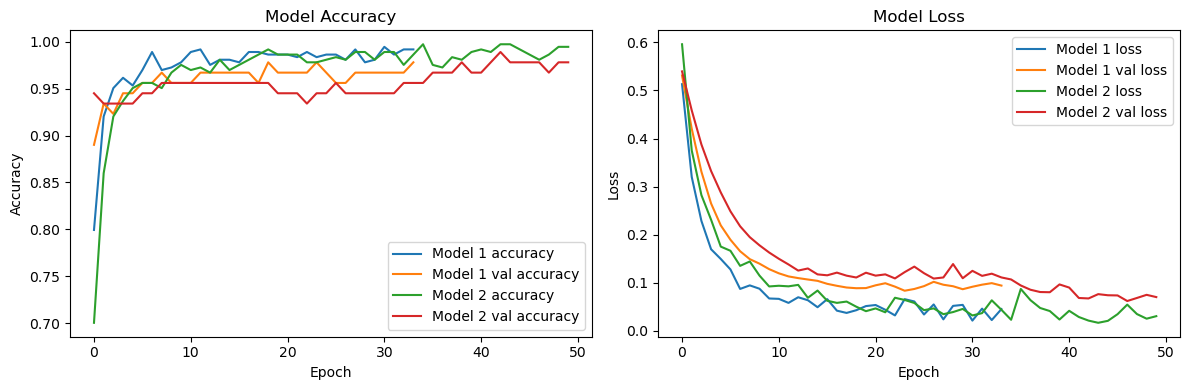

In [12]:
import pandas as pd
import numpy as np
import urllib.request
import ssl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Chargement des données
# Cette fonction télécharge le dataset depuis l'URL et le nettoie
# Elle gère également les valeurs manquantes et convertit les types de données
def load_data():
    try:
        ssl._create_default_https_context = ssl._create_unverified_context
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
        columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(30)]
        print("Téléchargement des données...")
        data = pd.read_csv(url, names=columns)
        if data.empty:
            raise Exception("Le dataset est vide")
    except Exception as e:
        print(f"Erreur lors du téléchargement des données: {e}")
        raise
    
    # Convertir 'diagnosis' en variable binaire (M = 1, B = 0)
    data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
    
    # Supprimer la colonne ID car elle n'est pas utile pour l'apprentissage
    data = data.drop(columns=['id'])
    
    return data

# 2. Prétraitement des données
# Sépare les features (X) et la target (y), puis effectue une standardisation des données
def preprocess_data(data):
    X = data.drop('diagnosis', axis=1)
    y = data['diagnosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

# 3. Modèle de réseau de neurones classique
# Un modèle simple avec quelques couches cachées
def create_model_1(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# 4. Modèle plus profond avec régularisation plus forte
# Ajoute plus de couches et de Dropout pour éviter l'overfitting
def create_model_2(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{model_name} - Test Accuracy: {test_accuracy:.4f}")
    return history

def plot_training_history(history1, history2):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Model 1 accuracy')
    plt.plot(history1.history['val_accuracy'], label='Model 1 val accuracy')
    plt.plot(history2.history['accuracy'], label='Model 2 accuracy')
    plt.plot(history2.history['val_accuracy'], label='Model 2 val accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Model 1 loss')
    plt.plot(history1.history['val_loss'], label='Model 1 val loss')
    plt.plot(history2.history['loss'], label='Model 2 loss')
    plt.plot(history2.history['val_loss'], label='Model 2 val loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    print("Chargement des données...")
    data = load_data()
    print("Dimension des données:", data.shape)
    print("\nPrétraitement des données...")
    X_train, X_test, y_train, y_test = preprocess_data(data)
    input_shape = (X_train.shape[1],)
    print("\nEntraînement du Modèle 1...")
    model1 = create_model_1(input_shape)
    history1 = train_and_evaluate(model1, X_train, X_test, y_train, y_test, "Model 1")
    print("\nEntraînement du Modèle 2...")
    model2 = create_model_2(input_shape)
    history2 = train_and_evaluate(model2, X_train, X_test, y_train, y_test, "Model 2")
    print("\nVisualisation des résultats...")
    plot_training_history(history1, history2)

if __name__ == "__main__":
    main()


Chargement des données...
Téléchargement des données...
Dimension des données: (297, 14)

Prétraitement des données...

Entraînement du Modèle 1...
Epoch 1/50
6/6 [==============================] - 2s 128ms/step - loss: 0.6726 - accuracy: 0.5714 - val_loss: 0.6936 - val_accuracy: 0.4375
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 0.6053 - accuracy: 0.6508 - val_loss: 0.6665 - val_accuracy: 0.5833
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.5555 - accuracy: 0.7037 - val_loss: 0.6432 - val_accuracy: 0.7292
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.5297 - accuracy: 0.7407 - val_loss: 0.6233 - val_accuracy: 0.7292
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 0.5108 - accuracy: 0.7725 - val_loss: 0.6030 - val_accuracy: 0.7500
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.4443 - accuracy: 0.8095 - val_loss: 0.5857 - val_accuracy: 0.7500
Epoch 7/50
6/6 [=

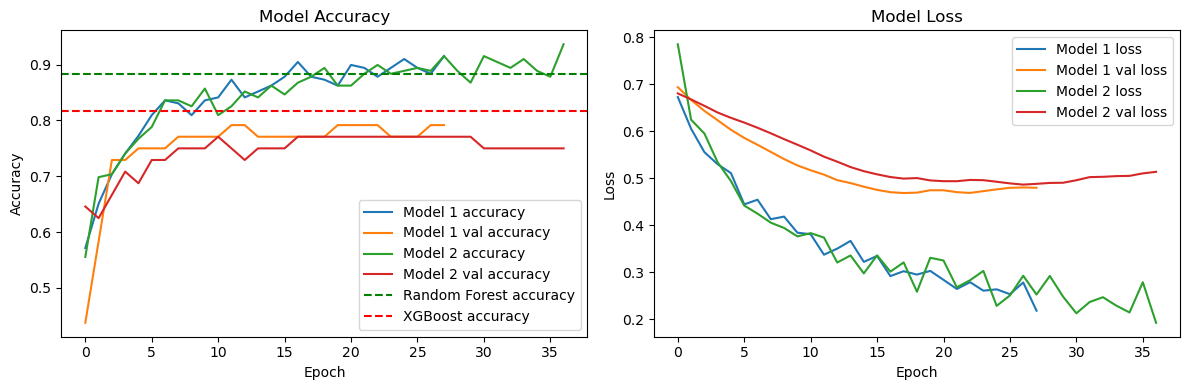

In [3]:
import pandas as pd
import numpy as np
import urllib.request
import ssl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Chargement des données
# Cette fonction télécharge le dataset depuis l'URL et le nettoie
# Elle gère également les valeurs manquantes et convertit les types de données
def load_data():
    try:
        ssl._create_default_https_context = ssl._create_unverified_context
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
        columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                   'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
        print("Téléchargement des données...")
        data = pd.read_csv(url, names=columns)
        if data.empty:
            raise Exception("Le dataset est vide")
    except Exception as e:
        print(f"Erreur lors du téléchargement des données: {e}")
        raise
    
    data = data.replace('?', np.nan)
    data = data.dropna()
    for column in data.columns:
        data[column] = pd.to_numeric(data[column])
    data['target'] = (data['target'] > 0).astype(int)
    return data

# 2. Prétraitement des données
# Sépare les features (X) et la target (y), puis effectue une standardisation des données
def preprocess_data(data):
    X = data.drop('target', axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test


# 3. Modèle de réseau de neurones classique
# Un modèle simple avec quelques couches cachées
def create_model_1(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# 4. Modèle plus profond avec régularisation plus forte
# Ajoute plus de couches et de Dropout pour éviter l'overfitting
def create_model_2(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# 5. Modèle Random Forest avec recherche d'hyperparamètres
def create_model_rf(X_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# 6. Modèle XGBoost avec GridSearchCV pour optimiser les hyperparamètres
def create_model_xgb(X_train, y_train):
    xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42)
    
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    }
    
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_

# 7. Fonction d'entraînement et d'évaluation pour les réseaux de neurones
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{model_name} - Test Accuracy: {test_accuracy:.4f}")
    return history

# 8. Fonction pour Random Forest et XGBoost
def train_and_evaluate_rf_xgb(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"\n{model_name} - Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy

# 9. Visualisation des performances de tous les modèles
def plot_training_history(history1, history2, rf_accuracy, xgb_accuracy):
    plt.figure(figsize=(12, 4))
    
    # Graphique de l'accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Model 1 accuracy')
    plt.plot(history1.history['val_accuracy'], label='Model 1 val accuracy')
    plt.plot(history2.history['accuracy'], label='Model 2 accuracy')
    plt.plot(history2.history['val_accuracy'], label='Model 2 val accuracy')
    plt.axhline(y=rf_accuracy, color='g', linestyle='--', label='Random Forest accuracy')
    plt.axhline(y=xgb_accuracy, color='r', linestyle='--', label='XGBoost accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Graphique de la loss
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Model 1 loss')
    plt.plot(history1.history['val_loss'], label='Model 1 val loss')
    plt.plot(history2.history['loss'], label='Model 2 loss')
    plt.plot(history2.history['val_loss'], label='Model 2 val loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 10. Programme principal
def main():
    print("Chargement des données...")
    data = load_data()
    print("Dimension des données:", data.shape)
    print("\nPrétraitement des données...")
    X_train, X_test, y_train, y_test = preprocess_data(data)
    
    # Réseaux de neurones
    print("\nEntraînement du Modèle 1...")
    model1 = create_model_1((X_train.shape[1],))
    history1 = train_and_evaluate(model1, X_train, X_test, y_train, y_test, "Model 1")

    print("\nEntraînement du Modèle 2...")
    model2 = create_model_2((X_train.shape[1],))
    history2 = train_and_evaluate(model2, X_train, X_test, y_train, y_test, "Model 2")

    print("\nEntraînement du Random Forest...")
    rf_model = create_model_rf(X_train, y_train)
    rf_accuracy = train_and_evaluate_rf_xgb(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

    print("\nEntraînement de XGBoost...")
    xgb_model = create_model_xgb(X_train, y_train)
    xgb_accuracy = train_and_evaluate_rf_xgb(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

    plot_training_history(history1, history2, rf_accuracy, xgb_accuracy)

if __name__ == "__main__":
    main()
